In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [5]:
gold_dataset = pd.read_csv(r"C:\Users\USER\Documents\Machine Learning Project\gld_price_data.csv")

In [6]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
gold_dataset.shape

(2290, 6)

In [10]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [16]:
gold_dataset = gold_dataset.drop(columns='Date', axis=1)

In [17]:
correlation = gold_dataset.corr()

In [18]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

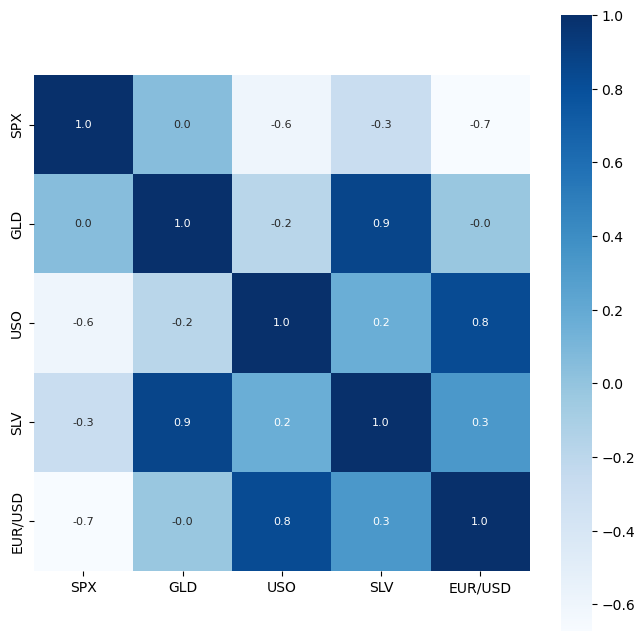

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar= True, square= True, fmt='.1f', annot= True, annot_kws= {'size':8},cmap= 'Blues')

In [22]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_1280\2886741629.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'], color= 'green')


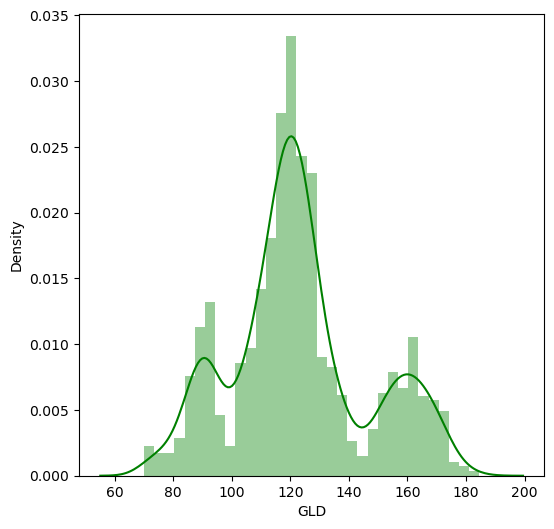

In [24]:
plt.figure(figsize=(6,6))
sns.distplot(gold_dataset['GLD'], color= 'green')
plt.show()

#### Spliting the features and Target

In [25]:
X = gold_dataset.drop(columns='GLD', axis=1)
Y = gold_dataset['GLD']

In [26]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


#### Train and test split

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [28]:
X_train.shape, Y_train.shape, X_test.shape

((1832, 4), (1832,), (458, 4))

#### Model training

In [29]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, Y_train)

RandomForestRegressor()

#### Evaluation

In [31]:
X_test_prediction = regressor.predict(X_test)
print(X_test_prediction)

[168.53199882  82.07329993 115.99139978 127.43260066 121.13870116
 154.66739851 150.32419857 125.96960063 117.57859868 125.98930077
 116.80710118 172.55080075 141.45669882 167.8979989  115.19400011
 118.00270012 138.44410309 169.95430016 158.71890299 158.3958996
 155.17130029 125.50750032 176.27189918 156.66240359 125.30520034
  93.78070011  77.2701999  120.9065001  119.09249945 167.50789945
  88.1759002  124.99010041  91.03900087 117.67930045 121.12169942
 136.20260043 115.51670129 114.77490078 148.99659957 106.98670109
 104.16420247  87.19979803 126.48430026 117.94810009 152.08659946
 119.55880023 108.49139997 108.12619821  93.22760063 127.03909791
  74.93050027 113.66789903 121.09289996 111.19929937 118.91219898
 120.88119933 159.66820076 167.72500064 147.02729626  85.99139859
  94.33790062  86.98369885  90.33369998 118.96160073 126.38430074
 127.60389998 169.41080011 122.36399918 117.67799872  98.68920014
 168.41790033 143.16289877 131.71030184 121.3414022  121.16979944
 119.599100

In [36]:
Error_score = metrics.r2_score(X_test_prediction, Y_test)
print(f'The R square value of the test data is {Error_score}')

The R square value of the test data is 0.9889034933673565


In [43]:
Y_test= list(Y_test)

#### Compare the Actual Values and Predicted Values in a plot

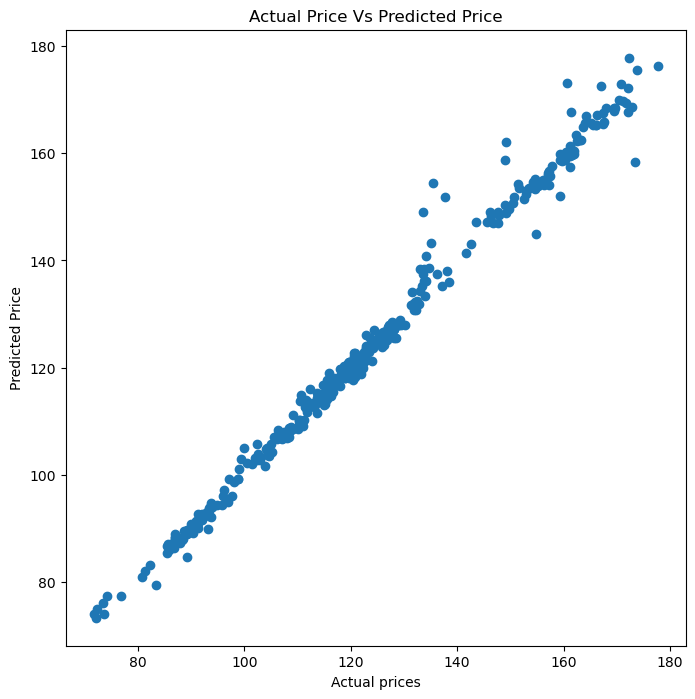

In [47]:
plt.figure(figsize=(8,8))
plt.scatter(Y_test,X_test_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Price')
plt.show()

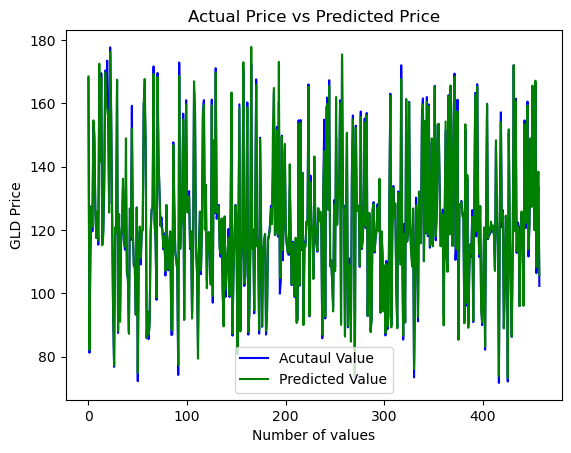

In [50]:
plt.plot(Y_test, color= 'blue', label= 'Acutaul Value')
plt.plot(X_test_prediction, color= 'green', label= 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()